In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

<b>Exercise 1</b>

In [51]:
n = 2
A = np.array([[3, 5], [7, 2]])
x_true = np.ones(n).reshape(-1, 1)

In [52]:
b = np.dot(A, x_true)

In [53]:
K_2 = np.linalg.cond(A, 2)
print(K_2)

2.618033988749895


In [54]:
K_inf = np.linalg.cond(A, np.inf)
print(K_inf)

3.1034482758620685


In [55]:
x_found = np.linalg.solve(A, b)

In [56]:
rel_err = (np.linalg.norm(np.subtract(x_found,x_true), 2))/(np.linalg.norm(x_true, 2))
print(rel_err)

0.0


In [57]:
def err_and_cond(n, vander = False, hilbert = False):
    A = np.random.rand(n, n)
    if vander:
        A = np.vander(np.arange(1, n+1))
    if hilbert:
        A = scipy.linalg.hilbert(n)
    x_true = np.ones(n).reshape(-1, 1)
    b = np.dot(A, x_true)
    K_2 = np.linalg.cond(A, 2)
    K_inf = np.linalg.cond(A, np.inf)
    x_found = np.linalg.solve(A, b)
    rel_err = (np.linalg.norm(np.subtract(x_found,x_true), 2))/(np.linalg.norm(x_true, 2))
    return rel_err, K_2, K_inf

In [58]:
def iterate_on_n(start, end, step, vander = False, hilbert = False):
    idx = np.arange(start, end, step)
    rel_errs, Ks_2, Ks_inf = [], [], []
    for n in idx:
        rel_err, K_2, K_inf = err_and_cond(n, vander, hilbert)
        rel_errs.append(rel_err)
        Ks_2.append(K_2)
        Ks_inf.append(K_inf)
    return idx, rel_errs, Ks_2, Ks_inf

In [59]:
def my_plot(idx, rel_errs, Ks_2, Ks_inf):
    plt.title("Relative Error over n")
    plt.plot(idx, rel_errs)
    plt.show()
    plt.title("Condition numbers over n")
    plt.plot(idx, Ks_2, label="K_2")
    plt.plot(idx, Ks_inf, label="K_inf")
    plt.legend(loc="upper left")
    plt.show()

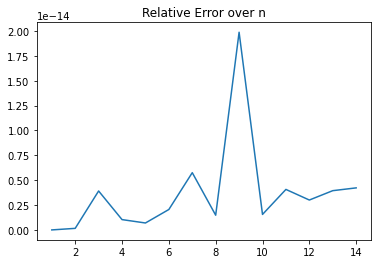

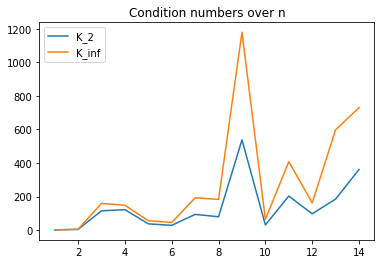

In [61]:
my_plot(*iterate_on_n(1, 15, 1))

<b>Exercise 2</b>

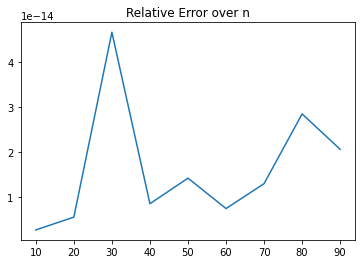

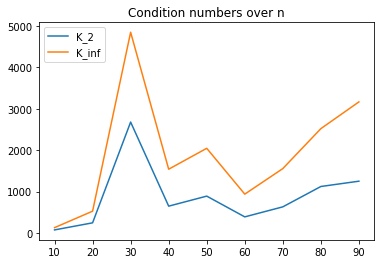

In [62]:
my_plot(*iterate_on_n(10, 100, 10))

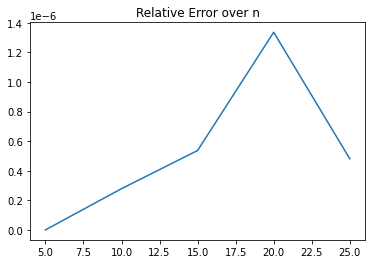

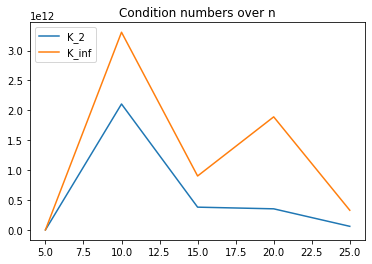

In [63]:
my_plot(*iterate_on_n(5, 30, 5, vander=True))

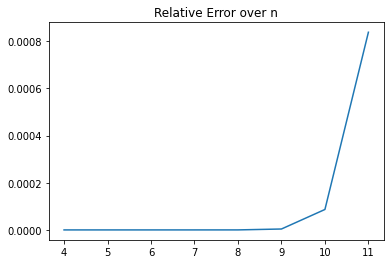

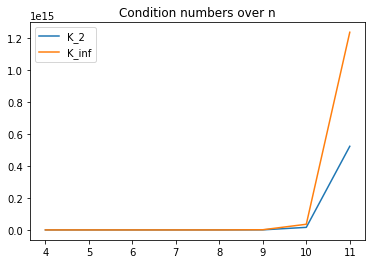

In [64]:
my_plot(*iterate_on_n(4, 12, 1, hilbert=True))

<b>Exercise 3</b>

In [65]:
machine_epsilon = 1
while float(1+machine_epsilon) > 1:
    last_one = machine_epsilon
    machine_epsilon = machine_epsilon/2
print(last_one)


2.220446049250313e-16


In [66]:
def a_n(n):
  return (1+(1/n))**n

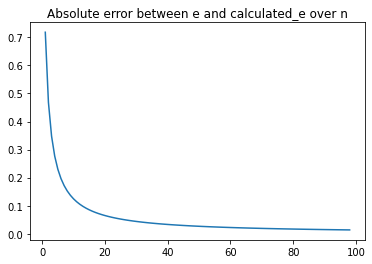

In [79]:
ns = np.arange(1, 99, 1)
ces = []
for n in ns:
    ces.append(a_n(n))
abs_errs = []
for ce in ces:
    abs_errs.append(math.e - ce)
plt.title("Absolute error between e and calculated_e over n")
plt.plot(np.arange(1, len(ns)+1), abs_errs)
plt.show()

In [82]:
A = np.matrix([[4, 2], [1, 3]])
B = np.matrix([[4, 2], [2 ,1]])
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)
A_eig = np.linalg.eig(A)
B_eig = np.linalg.eig(B) 
print(A_rank)
print(A_eig[0])
print(B_rank)
print(B_eig[0])

2
[5. 2.]
1
[5. 0.]


In [83]:
C = np.matrix([[1, 2, 3], [6, 12, 9], [9, 2, 1]])
print(np.linalg.matrix_rank(C))
print(np.linalg.eig(C)[0])

D = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.linalg.matrix_rank(D))
print(np.linalg.eig(D)[0])

E = np.matrix([[1, 0, 3], [2, 0, 4], [5, 0, 9]])
print(np.linalg.matrix_rank(E))
print(np.linalg.eig(E)[0])

3
[15.46698572 -3.8716714   2.40468568]
2
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
2
[ 0.         -0.56776436 10.56776436]
